# SPRINT N°2
* Fecha de inicio: 02/12/2024
* Fecha de presentación: 9/12/2024

## DATA CLEANING

### LIBRERÍAS

In [113]:
import pymysql
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### CONEXIÓN

In [114]:
EquipC = pymysql.connect(
  host= "212.227.90.6",
  user="EquipoC",
  password="E1q2u3i4p5oC",
  database="EquipC"
)
print(EquipC)

In [115]:
mycursor = EquipC.cursor()
mycursor.execute("SELECT DATABASE()")
current_db = mycursor.fetchone()
print("Base de datos actual:", current_db)
mycursor.execute("SHOW TABLES")

Base de datos actual: ('EquipC',)


3

In [116]:
mycursor.execute("SHOW TABLES")
for x in mycursor:
    print(x)

('BANK_marketing',)
('BANK_marketing021224',)
('vista_finanzas',)


In [117]:
#bbdd SPRINT 1
BANK_marketing = 'SELECT * FROM BANK_marketing'
df_BANK_marketing = pd.read_sql(BANK_marketing, EquipC)

#bbdd SPRINT 2
BANK_marketing021224 = 'SELECT * FROM BANK_marketing021224'
df_BANK_marketing021224 = pd.read_sql(BANK_marketing021224, EquipC)

C:\Users\Federico Labate\AppData\Local\Temp\ipykernel_19604\3661644793.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_BANK_marketing = pd.read_sql(BANK_marketing, EquipC)
C:\Users\Federico Labate\AppData\Local\Temp\ipykernel_19604\3661644793.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_BANK_marketing021224 = pd.read_sql(BANK_marketing021224, EquipC)


### DATAFRAME 

#### SPRINT N°1

In [118]:
df_BANK_marketing

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,3,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,4,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,5,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,11159,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11159,11160,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11160,11161,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11161,11162,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


#### SPRINT N°2

In [119]:
df_BANK_marketing021224

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,3,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,4,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,5,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16168,6661,46.0,services,divorced,unknown,no,3390,no,no,unknown,20,jun,152,3,-1,0,unknown,no
16169,17819,45.0,unemployed,divorced,primary,yes,11,no,no,cellular,13,aug,489,5,-1,0,unknown,yes
16170,2487,58.0,self-employed,married,primary,no,1013,yes,no,cellular,11,aug,206,1,461,1,failure,yes
16171,523,58.0,retired,married,unknown,no,9004,no,no,cellular,21,jul,891,4,-1,0,unknown,yes


##### REGISTROS NUEVOS

In [120]:
diff_count = len(df_BANK_marketing021224) -  len(df_BANK_marketing)
print(f"Registros nuevos: {diff_count}")

Registros nuevos: 5010


### RENOMBRO DATRAFAME PARA APROVECHAR EL SCRIPT

In [121]:
df_BANK_marketing = df_BANK_marketing021224

### RENOMBRAR COLUMNAS

#### deafult -> is_in_deafult

In [123]:
df_BANK_marketing.rename(columns={'default': 'is_in_default'}, inplace=True)
df_BANK_marketing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,3,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,4,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,5,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16168,6661,46.0,services,divorced,unknown,no,3390,no,no,unknown,20,jun,152,3,-1,0,unknown,no
16169,17819,45.0,unemployed,divorced,primary,yes,11,no,no,cellular,13,aug,489,5,-1,0,unknown,yes
16170,2487,58.0,self-employed,married,primary,no,1013,yes,no,cellular,11,aug,206,1,461,1,failure,yes
16171,523,58.0,retired,married,unknown,no,9004,no,no,cellular,21,jul,891,4,-1,0,unknown,yes


### RENOMBRAR REGISTROS

#### yes = 1, no = 0

In [124]:
df_BANK_marketing = df_BANK_marketing.replace({'yes': 1, 'no': 0})
df_BANK_marketing

C:\Users\Federico Labate\AppData\Local\Temp\ipykernel_19604\845767665.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_BANK_marketing = df_BANK_marketing.replace({'yes': 1, 'no': 0})


,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59.0,admin.,married,secondary,0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56.0,admin.,married,secondary,0,45,0.0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41.0,technician,married,secondary,0,1270,1.0,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55.0,services,married,secondary,0,2476,1.0,0,unknown,5,may,579,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16168,6661,46.0,services,divorced,unknown,0,3390,0.0,0,unknown,20,jun,152,3,-1,0,unknown,0
16169,17819,45.0,unemployed,divorced,primary,1,11,0.0,0,cellular,13,aug,489,5,-1,0,unknown,1
16170,2487,58.0,self-employed,married,primary,0,1013,1.0,0,cellular,11,aug,206,1,461,1,failure,1
16171,523,58.0,retired,married,unknown,0,9004,0.0,0,cellular,21,jul,891,4,-1,0,unknown,1


### RESOLVER ESPACIOS EN BLANCO

In [125]:
df_BANK_marketing = df_BANK_marketing.replace({' ':''})
df_BANK_marketing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59.0,admin.,married,secondary,0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56.0,admin.,married,secondary,0,45,0.0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41.0,technician,married,secondary,0,1270,1.0,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55.0,services,married,secondary,0,2476,1.0,0,unknown,5,may,579,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16168,6661,46.0,services,divorced,unknown,0,3390,0.0,0,unknown,20,jun,152,3,-1,0,unknown,0
16169,17819,45.0,unemployed,divorced,primary,1,11,0.0,0,cellular,13,aug,489,5,-1,0,unknown,1
16170,2487,58.0,self-employed,married,primary,0,1013,1.0,0,cellular,11,aug,206,1,461,1,failure,1
16171,523,58.0,retired,married,unknown,0,9004,0.0,0,cellular,21,jul,891,4,-1,0,unknown,1


### DUPLICADOS 👈

In [126]:
df_BANK_marketing.duplicated().sum()

np.int64(10)

In [127]:
#Registros duplicados
duplicated_rows = df_BANK_marketing[df_BANK_marketing.duplicated()]
print("Registros duplicados:")
duplicated_rows

Registros duplicados:


,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
16163,19938,50.0,blue-collar,married,primary,0,71,1.0,0,unknown,6,may,678,1,-1,0,unknown,0
16164,4559,48.0,admin.,married,secondary,0,660,0.0,0,cellular,18,feb,318,1,561,2,success,1
16165,9360,58.0,technician,married,unknown,0,49,1.0,0,unknown,15,may,75,2,-1,0,unknown,0
16166,17033,28.0,blue-collar,single,primary,0,426,1.0,0,cellular,18,may,953,3,-1,0,unknown,0
16167,8821,58.0,blue-collar,married,primary,0,73,0.0,0,unknown,17,jun,116,1,-1,0,unknown,0
16168,6661,46.0,services,divorced,unknown,0,3390,0.0,0,unknown,20,jun,152,3,-1,0,unknown,0
16169,17819,45.0,unemployed,divorced,primary,1,11,0.0,0,cellular,13,aug,489,5,-1,0,unknown,1
16170,2487,58.0,self-employed,married,primary,0,1013,1.0,0,cellular,11,aug,206,1,461,1,failure,1
16171,523,58.0,retired,married,unknown,0,9004,0.0,0,cellular,21,jul,891,4,-1,0,unknown,1
16172,2362,42.0,entrepreneur,married,secondary,0,2959,1.0,0,telephone,2,jul,711,1,342,1,failure,1


#### RESOLUCIÓN DE DUPLICADOS 👈

In [128]:
#df_BANK_marketing = df_BANK_marketing.drop_duplicates()

### NULOS

#### IDENTIFICACIÓN DE NULOS

In [129]:
df_BANK_marketing.isnull().sum()          

id                0
age              15
job               0
marital           8
education        10
is_in_default     0
balance           0
housing          20
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
deposit           0
dtype: int64

In [130]:
df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16173 non-null  int64  
 1   age            16158 non-null  float64
 2   job            16173 non-null  object 
 3   marital        16165 non-null  object 
 4   education      16163 non-null  object 
 5   is_in_default  16173 non-null  int64  
 6   balance        16173 non-null  int64  
 7   housing        16153 non-null  float64
 8   loan           16173 non-null  int64  
 9   contact        16173 non-null  object 
 10  day            16173 non-null  int64  
 11  month          16173 non-null  object 
 12  duration       16173 non-null  int64  
 13  campaign       16173 non-null  int64  
 14  pdays          16173 non-null  int64  
 15  previous       16173 non-null  int64  
 16  poutcome       16173 non-null  object 
 17  deposit        16173 non-null  int64  
dtypes: flo

#### RESOLUCIÓN DE NULOS

##### MARITAL
  * Propuesta: Usar la moda con respecto a "age"

In [131]:
nulos_marital = df_BANK_marketing[df_BANK_marketing['marital'].isna()].sort_values('age',ascending=True)
nulos_marital

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
15513,20734,30.0,blue-collar,None,primary,0,35,1.0,0,cellular,11,jul,366,2,-1,0,unknown,0
9273,9274,30.0,blue-collar,None,primary,0,35,1.0,0,cellular,11,jul,366,2,-1,0,unknown,0
4855,4856,34.0,management,None,tertiary,0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
13124,18345,34.0,management,None,tertiary,0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
1089,1090,53.0,management,None,secondary,0,1004,0.0,1,telephone,22,dec,119,1,-1,0,unknown,1
6702,6703,60.0,admin.,None,primary,0,-444,0.0,1,cellular,16,jul,227,1,-1,0,unknown,0
12584,17805,60.0,admin.,None,primary,0,-444,0.0,1,cellular,16,jul,227,1,-1,0,unknown,0
3720,3721,68.0,retired,None,secondary,0,4189,0.0,0,telephone,14,jul,897,2,-1,0,unknown,1


In [132]:
#DF con los 'ages' en cuestión para descubrir su marital
valores_filtrados = [30, 34, 53, 60, 68] 
df_BANK_marketing_age = df_BANK_marketing[df_BANK_marketing['age'].isin(valores_filtrados)]

In [133]:
df_BANK_marketing_age.groupby(['age','marital']).agg({'marital': 'count'})

marital
age  marital          
30.0 divorced       31
     married       214
     single        426
34.0 divorced       44
     married       390
     single        232
53.0 divorced       51
     married       220
     single         23
60.0 divorced       53
     married       189
     single          7
68.0 divorced        7
     married        19
     single          4

###### RESULTADO MARITAL

age | marital:
* 30 -> single
* 34 -> married
* 53 -> married
* 60 -> married
* 68 -> married

In [134]:
#Función para asignar el valor a 'marital'
def completar_marital(row):
    if pd.isna(row['marital']):  #Si 'marital' es nulo
        if row['age'] == 30:
            return 'single'
        elif row['age'] == 34:
            return 'married'
        elif row['age'] == 53:
            return 'married'
        elif row['age'] == 60:
            return 'married'
        elif row['age'] == 68:
            return 'married'
    return row['marital']  #Si 'marital' no es nulo, lo dejamos igual

#Ejecuto la función con .apply()
df_BANK_marketing['marital'] = df_BANK_marketing.apply(completar_marital, axis=1)

In [135]:
#Confirmo los cambios con los id afectados
ids_filtrados_marital = [20734, 9274, 4856, 18345, 1090, 6703, 17805, 3721]

df_filtrado_marital = df_BANK_marketing[df_BANK_marketing['id'].isin(ids_filtrados_marital)].sort_values('age',ascending=True)

df_filtrado_marital

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
15513,20734,30.0,blue-collar,single,primary,0,35,1.0,0,cellular,11,jul,366,2,-1,0,unknown,0
9273,9274,30.0,blue-collar,single,primary,0,35,1.0,0,cellular,11,jul,366,2,-1,0,unknown,0
4855,4856,34.0,management,married,tertiary,0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
13124,18345,34.0,management,married,tertiary,0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
1089,1090,53.0,management,married,secondary,0,1004,0.0,1,telephone,22,dec,119,1,-1,0,unknown,1
6702,6703,60.0,admin.,married,primary,0,-444,0.0,1,cellular,16,jul,227,1,-1,0,unknown,0
12584,17805,60.0,admin.,married,primary,0,-444,0.0,1,cellular,16,jul,227,1,-1,0,unknown,0
3720,3721,68.0,retired,married,secondary,0,4189,0.0,0,telephone,14,jul,897,2,-1,0,unknown,1


##### AGE
  * Propuesta: Usar la media de los "marital"

In [136]:
nulos_age = df_BANK_marketing[df_BANK_marketing['age'].isna()]
nulos_age

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1182,1183,NaN,management,married,tertiary,0,309,1.0,0,cellular,5,feb,676,1,-1,0,unknown,1
1411,1412,NaN,blue-collar,married,primary,0,4979,0.0,0,telephone,6,apr,180,1,-1,0,unknown,1
4020,4021,NaN,services,single,secondary,0,1934,0.0,0,cellular,29,sep,271,1,-1,0,unknown,1
5681,5682,NaN,technician,single,tertiary,0,720,0.0,0,cellular,12,aug,234,4,-1,0,unknown,0
6764,6765,NaN,technician,single,tertiary,0,686,1.0,0,unknown,30,may,98,2,-1,0,unknown,0
8420,8421,NaN,blue-collar,married,secondary,0,1782,1.0,0,unknown,19,jun,549,1,-1,0,unknown,0
9471,9472,NaN,management,married,tertiary,0,552,0.0,0,cellular,28,jul,761,8,-1,0,unknown,0
9553,9554,NaN,admin.,married,secondary,0,1648,1.0,0,cellular,19,nov,172,3,-1,0,unknown,0
9752,9753,NaN,services,married,primary,0,2567,1.0,0,cellular,14,may,109,1,360,2,failure,0
10679,10680,NaN,technician,divorced,tertiary,0,0,1.0,0,cellular,2,jun,72,1,-1,0,unknown,0


###### RESULTADO AGE

In [137]:
# Calcular la media de 'age' para cada categoría en 'marital'
media_por_marital = df_BANK_marketing.groupby('marital')['age'].mean().round(0)
media_por_marital

marital
divorced    47.0
married     45.0
single      33.0
Name: age, dtype: float64

In [138]:
#Función para asignar el valor a 'age'
def completar_age(row):
    if pd.isna(row['age']):  #Si 'age' es nulo
        if row['marital'] == 'divorced':
            return 47
        elif row['marital'] == 'married':
            return 45
        elif row['marital'] == 'single':
            return 33
    return row['age']  #Si 'age' no es nulo, lo dejamos igual

#Ejecuto la función con .apply()
df_BANK_marketing['age'] = df_BANK_marketing.apply(completar_age, axis=1)

In [139]:
#Confirmo los cambios con los id afectados
ids_filtrados_marital = [1183, 1412, 4021, 5682, 6765, 8421, 9472, 9554, 9753, 10680, 16846, 16907, 17560, 19617, 21255]

df_filtrado_marital = df_BANK_marketing[df_BANK_marketing['id'].isin(ids_filtrados_marital)].sort_values('id',ascending=True)

df_filtrado_marital

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1182,1183,45.0,management,married,tertiary,0,309,1.0,0,cellular,5,feb,676,1,-1,0,unknown,1
1411,1412,45.0,blue-collar,married,primary,0,4979,0.0,0,telephone,6,apr,180,1,-1,0,unknown,1
4020,4021,33.0,services,single,secondary,0,1934,0.0,0,cellular,29,sep,271,1,-1,0,unknown,1
5681,5682,33.0,technician,single,tertiary,0,720,0.0,0,cellular,12,aug,234,4,-1,0,unknown,0
6764,6765,33.0,technician,single,tertiary,0,686,1.0,0,unknown,30,may,98,2,-1,0,unknown,0
8420,8421,45.0,blue-collar,married,secondary,0,1782,1.0,0,unknown,19,jun,549,1,-1,0,unknown,0
9471,9472,45.0,management,married,tertiary,0,552,0.0,0,cellular,28,jul,761,8,-1,0,unknown,0
9553,9554,45.0,admin.,married,secondary,0,1648,1.0,0,cellular,19,nov,172,3,-1,0,unknown,0
9752,9753,45.0,services,married,primary,0,2567,1.0,0,cellular,14,may,109,1,360,2,failure,0
10679,10680,47.0,technician,divorced,tertiary,0,0,1.0,0,cellular,2,jun,72,1,-1,0,unknown,0


##### EDUCATION
  *  Propuesta: Usar la moda con respecto a "job"

In [140]:
nulos_education = df_BANK_marketing[df_BANK_marketing['education'].isna()]
nulos_education 

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1301,1302,37.0,technician,married,None,0,549,0.0,0,cellular,2,mar,239,1,-1,0,unknown,1
2944,2945,24.0,student,single,None,0,382,0.0,0,cellular,13,nov,256,2,92,3,failure,1
4738,4739,37.0,management,single,None,0,102,1.0,0,cellular,6,may,445,1,258,2,failure,1
6820,6821,32.0,services,married,None,0,-344,0.0,1,cellular,4,feb,44,1,-1,0,unknown,0
7122,7123,57.0,entrepreneur,married,None,0,657,0.0,0,unknown,12,jun,344,1,-1,0,unknown,0
8593,8594,55.0,management,single,None,0,797,0.0,0,cellular,29,jul,24,2,-1,0,unknown,0
9407,9408,32.0,technician,single,None,0,696,0.0,1,cellular,13,aug,101,4,105,4,failure,0
13138,18359,32.0,technician,single,None,0,696,0.0,1,cellular,13,aug,101,4,105,4,failure,0
14807,20028,37.0,technician,married,None,0,549,0.0,0,cellular,2,mar,239,1,-1,0,unknown,1
14915,20136,24.0,student,single,None,0,382,0.0,0,cellular,13,nov,256,2,92,3,failure,1


In [141]:
#DF con los 'job' en cuestión para descubrir su education
valores_filtrados = ['technician', 'student', 'management', 'services', 'entrepreneur'] 
df_BANK_marketing_job = df_BANK_marketing[df_BANK_marketing['job'].isin(valores_filtrados)]

In [142]:
df_BANK_marketing_job.groupby(['job','education']).agg({'id': 'count'})

id
job          education      
entrepreneur primary      63
             secondary   201
             tertiary    181
             unknown      15
management   primary      92
             secondary   337
             tertiary   3169
             unknown     119
services     primary     123
             secondary  1097
             tertiary     74
             unknown      62
student      primary      32
             secondary   272
             tertiary    124
             unknown      95
technician   primary      60
             secondary  1740
             tertiary    749
             unknown      71

###### RESULTADO EDUCATION

job | education:
* entrepreneur -> secondary
* management -> tertiary
* services -> secondary
* student -> secondary
* technician -> secondary

In [143]:
#Función para asignar el valor a 'education'
def completar_education(row):
    if pd.isna(row['education']):  #Si 'job' es nulo
        if row['job'] == 'entrepreneur':
            return 'secondary'
        elif row['job'] == 'management':
            return 'tertiary'
        elif row['job'] == 'services':
            return 'secondary'
        elif row['job'] == 'student':
            return 'secondary'
        elif row['job'] == 'technician':
            return 'secondary'        
    return row['education']  #Si 'education' no es nulo, lo dejamos igual

#Ejecuto la función con .apply()
df_BANK_marketing['education'] = df_BANK_marketing.apply(completar_education, axis=1)

In [144]:
#Confirmo los cambios con los id afectados
ids_filtrados_education = [1302, 2945, 4739, 6821, 7123, 8594, 9408, 18359, 20028, 20136]

ids_filtrados_education = df_BANK_marketing[df_BANK_marketing['id'].isin(ids_filtrados_education)].sort_values('id',ascending=True)

ids_filtrados_education

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1301,1302,37.0,technician,married,secondary,0,549,0.0,0,cellular,2,mar,239,1,-1,0,unknown,1
2944,2945,24.0,student,single,secondary,0,382,0.0,0,cellular,13,nov,256,2,92,3,failure,1
4738,4739,37.0,management,single,tertiary,0,102,1.0,0,cellular,6,may,445,1,258,2,failure,1
6820,6821,32.0,services,married,secondary,0,-344,0.0,1,cellular,4,feb,44,1,-1,0,unknown,0
7122,7123,57.0,entrepreneur,married,secondary,0,657,0.0,0,unknown,12,jun,344,1,-1,0,unknown,0
8593,8594,55.0,management,single,tertiary,0,797,0.0,0,cellular,29,jul,24,2,-1,0,unknown,0
9407,9408,32.0,technician,single,secondary,0,696,0.0,1,cellular,13,aug,101,4,105,4,failure,0
13138,18359,32.0,technician,single,secondary,0,696,0.0,1,cellular,13,aug,101,4,105,4,failure,0
14807,20028,37.0,technician,married,secondary,0,549,0.0,0,cellular,2,mar,239,1,-1,0,unknown,1
14915,20136,24.0,student,single,secondary,0,382,0.0,0,cellular,13,nov,256,2,92,3,failure,1


##### HOUSING 👈 (20 NULOS)
  * Propuesta:

In [188]:
nulos_housing = df_BANK_marketing[df_BANK_marketing['housing'].isna()].sort_values('id',ascending=True)
nulos_housing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
189,190,32.0,services,married,secondary,0,-34,NaN,0,unknown,30,may,1236,2,-1,0,unknown,1
312,313,39.0,blue-collar,married,primary,0,2303,NaN,0,unknown,17,jun,775,3,-1,0,unknown,1
1528,1529,38.0,management,married,tertiary,0,165,NaN,0,cellular,17,apr,526,1,260,2,other,1
2046,2047,34.0,services,divorced,secondary,0,89,NaN,0,cellular,15,may,1871,4,-1,0,unknown,1
2275,2276,40.0,admin.,single,secondary,0,985,NaN,0,cellular,4,jun,592,3,50,8,failure,1
2667,2668,70.0,retired,married,primary,0,6538,NaN,0,cellular,9,sep,394,1,-1,0,unknown,1
3244,3245,52.0,services,married,secondary,0,961,NaN,1,cellular,18,feb,222,1,553,4,failure,1
4268,4269,34.0,technician,married,secondary,0,1,NaN,0,cellular,28,aug,535,2,-1,0,unknown,1
5092,5093,42.0,management,married,tertiary,0,372,NaN,0,cellular,4,aug,153,3,1,2,success,1
6430,6431,60.0,blue-collar,married,secondary,0,0,NaN,1,unknown,5,jun,124,1,-1,0,unknown,0


###### RESULTADO HOUSING 👈

### EXPORTACIÓN A .CSV

In [145]:
df_BANK_marketing.to_csv('df_BANK_marketing_Sprint2.csv', index=False)

### EXPORTACIÓN A PARQUET

In [146]:
df_BANK_marketing.to_parquet('df_BANK_marketing_Sprint2.parquet', index=False)

## EDA (Exploratory Data Analisis)

### ESTRUCTURA DEL DATASET

#### Número de filas y columnas del dataset

In [147]:
df_BANK_marketing.shape

(16173, 18)

#### Tipología de los datos y valores nulos del dataset

In [148]:
df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16173 non-null  int64  
 1   age            16173 non-null  float64
 2   job            16173 non-null  object 
 3   marital        16173 non-null  object 
 4   education      16173 non-null  object 
 5   is_in_default  16173 non-null  int64  
 6   balance        16173 non-null  int64  
 7   housing        16153 non-null  float64
 8   loan           16173 non-null  int64  
 9   contact        16173 non-null  object 
 10  day            16173 non-null  int64  
 11  month          16173 non-null  object 
 12  duration       16173 non-null  int64  
 13  campaign       16173 non-null  int64  
 14  pdays          16173 non-null  int64  
 15  previous       16173 non-null  int64  
 16  poutcome       16173 non-null  object 
 17  deposit        16173 non-null  int64  
dtypes: flo

#### Primeras filas del dataset

In [149]:
df_BANK_marketing.head()

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59.0,admin.,married,secondary,0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56.0,admin.,married,secondary,0,45,0.0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41.0,technician,married,secondary,0,1270,1.0,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55.0,services,married,secondary,0,2476,1.0,0,unknown,5,may,579,1,-1,0,unknown,1


### VARIABLES DEL DATASET

#### Variables numéricas

In [150]:
df_BANK_marketing.describe().round()

,id,age,is_in_default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
count,16173.0,16173.0,16173.0,16173.0,16153.0,16173.0,16173.0,16173.0,16173.0,16173.0,16173.0,16173.0
mean,9696.0,41.0,0.0,1526.0,0.0,0.0,16.0,372.0,3.0,51.0,1.0,0.0
std,6754.0,12.0,0.0,3322.0,0.0,0.0,8.0,348.0,3.0,109.0,2.0,0.0
min,1.0,18.0,0.0,-6847.0,0.0,0.0,1.0,2.0,1.0,-1.0,0.0,0.0
25%,4041.0,32.0,0.0,121.0,0.0,0.0,8.0,138.0,1.0,-1.0,0.0,0.0
50%,8082.0,39.0,0.0,542.0,0.0,0.0,15.0,254.0,2.0,-1.0,0.0,0.0
75%,17342.0,49.0,0.0,1689.0,1.0,0.0,22.0,494.0,3.0,20.0,1.0,1.0
max,21383.0,95.0,1.0,81204.0,1.0,1.0,31.0,3881.0,63.0,854.0,58.0,1.0


#### Variables categóricas

In [151]:
categorical_columns = df_BANK_marketing.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')


In [152]:
for col in categorical_columns:
    print(f"Variable categórica: {col}")
    print(f"Valores y frecuencias:\n{df_BANK_marketing[col].value_counts()}")
    print("-" * 40)


Variable categórica: job
Valores y frecuencias:
job
management       3719
blue-collar      2817
technician       2624
admin.           1932
services         1357
retired          1140
self-employed     577
student           525
unemployed        508
entrepreneur      461
housemaid         403
unknown           110
Name: count, dtype: int64
----------------------------------------
Variable categórica: marital
Valores y frecuencias:
marital
married     9179
single      5111
divorced    1883
Name: count, dtype: int64
----------------------------------------
Variable categórica: education
Valores y frecuencias:
education
secondary    7945
tertiary     5338
primary      2169
unknown       721
Name: count, dtype: int64
----------------------------------------
Variable categórica: contact
Valores y frecuencias:
contact
cellular     11677
unknown       3388
telephone     1108
Name: count, dtype: int64
----------------------------------------
Variable categórica: month
Valores y frecuencias:
mo

#### Valores nulos

In [153]:
df_BANK_marketing.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
is_in_default     0
balance           0
housing          20
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
deposit           0
dtype: int64

### ANÁLISIS VARIABLES CATEGÓRICAS

#### Variable job

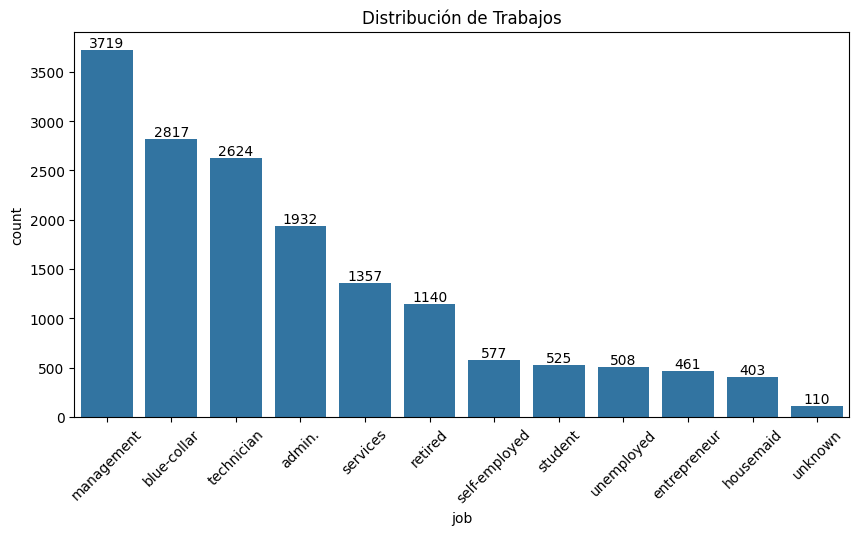

In [154]:
plt.figure(figsize=(10, 5))
num_job = sns.countplot(data=df_BANK_marketing, x='job', order=df_BANK_marketing['job'].value_counts().index)
for bar in num_job.containers: # número en las barras
    num_job.bar_label(bar)
plt.title('Distribución de Trabajos')
plt.xticks(rotation=45)
plt.show()

#### Variable marital

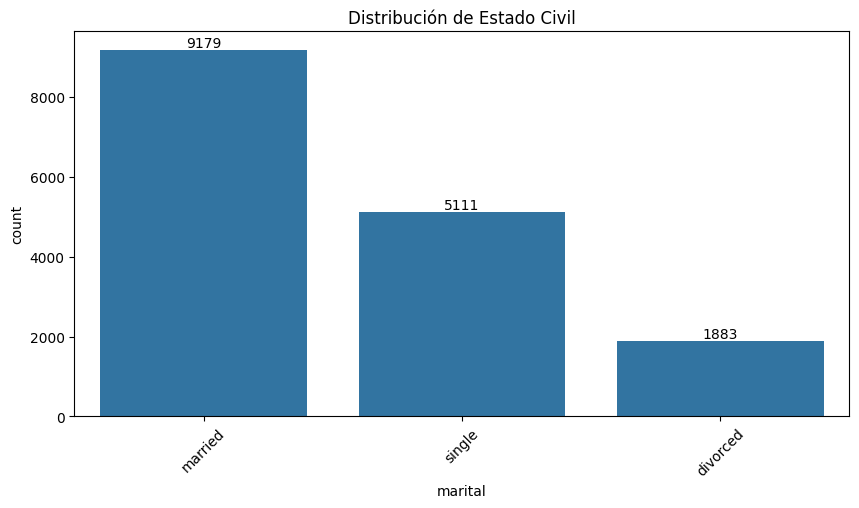

In [155]:
plt.figure(figsize=(10, 5))
num_marital = sns.countplot(data=df_BANK_marketing, x='marital', order=df_BANK_marketing['marital'].value_counts().index)
for bar in num_marital.containers: # número en las barras
    num_marital.bar_label(bar)
plt.title('Distribución de Estado Civil')
plt.xticks(rotation=45)
plt.show()

#### Variable education

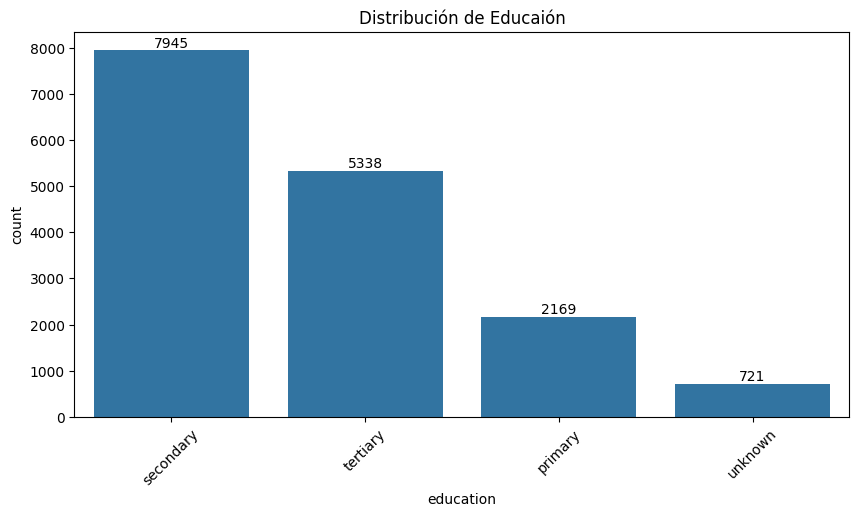

In [156]:
plt.figure(figsize=(10, 5))
num_education = sns.countplot(data=df_BANK_marketing, x='education', order=df_BANK_marketing['education'].value_counts().index)
for bar in num_education.containers: # número en las barras
    num_education.bar_label(bar)
plt.title('Distribución de Educaión')
plt.xticks(rotation=45)
plt.show()

#### Variable contact

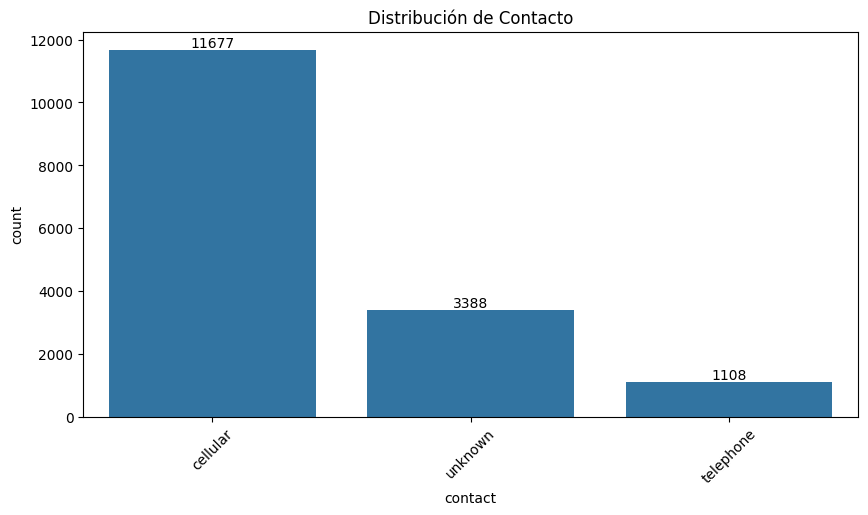

In [157]:
plt.figure(figsize=(10, 5))
num_contact = sns.countplot(data=df_BANK_marketing, x='contact', order=df_BANK_marketing['contact'].value_counts().index)
for bar in num_contact.containers: # número en las barras
    num_contact.bar_label(bar)
plt.title('Distribución de Contacto')
plt.xticks(rotation=45)
plt.show()

#### Variable month

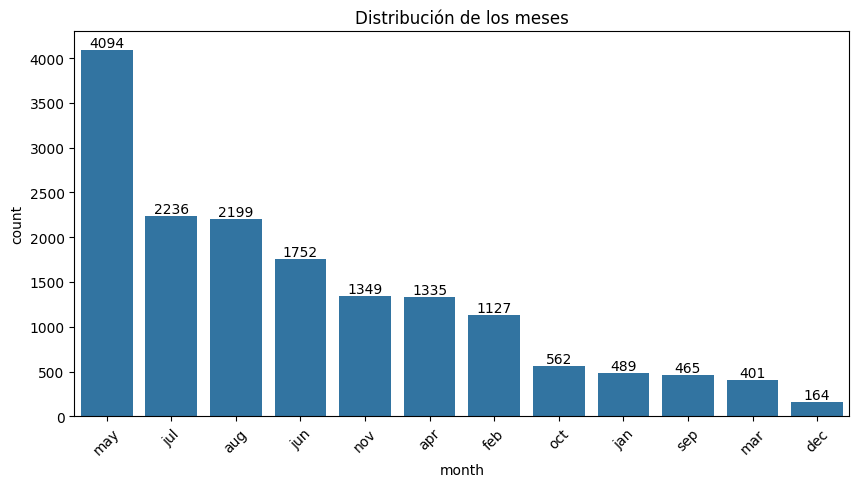

In [158]:
plt.figure(figsize=(10, 5))
num_month = sns.countplot(data=df_BANK_marketing, x='month', order=df_BANK_marketing['month'].value_counts().index)
for bar in num_month.containers: # número en las barras
    num_month.bar_label(bar)
plt.title('Distribución de los meses')
plt.xticks(rotation=45)
plt.show()

#### Variable poutcome

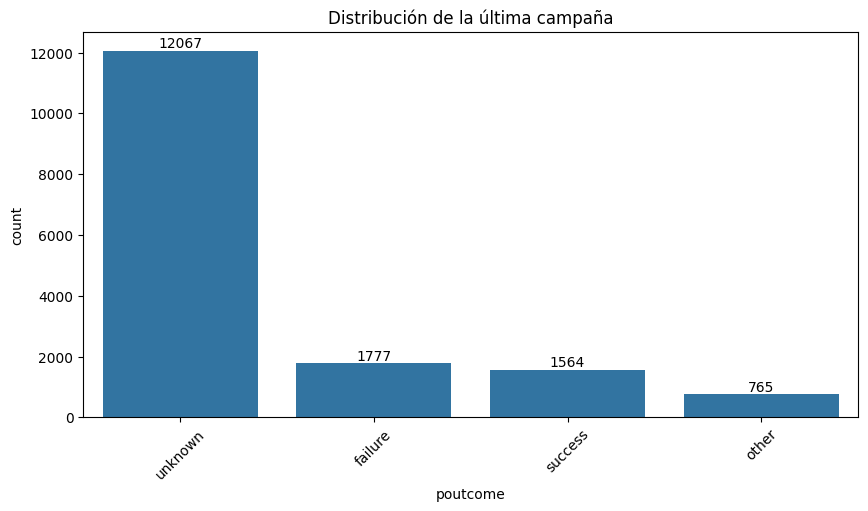

In [159]:
plt.figure(figsize=(10, 5))
num_poutcome = sns.countplot(data=df_BANK_marketing, x='poutcome', order=df_BANK_marketing['poutcome'].value_counts().index)
for bar in num_poutcome.containers: # número en las barras
    num_poutcome.bar_label(bar)
plt.title('Distribución de la última campaña')
plt.xticks(rotation=45)
plt.show()

### ANÁLISIS VARIABLES NUMÉRICAS

#### Variable balance

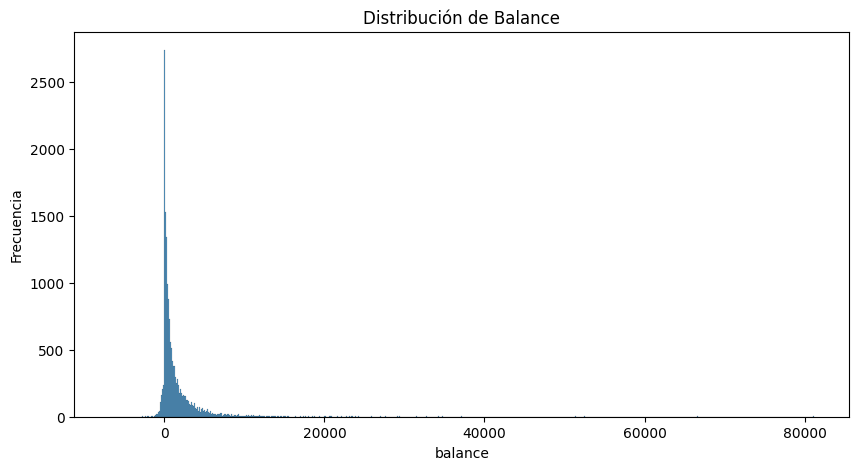

In [160]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['balance'])
plt.title('Distribución de Balance')
plt.xlabel('balance')
plt.ylabel('Frecuencia')
plt.show()

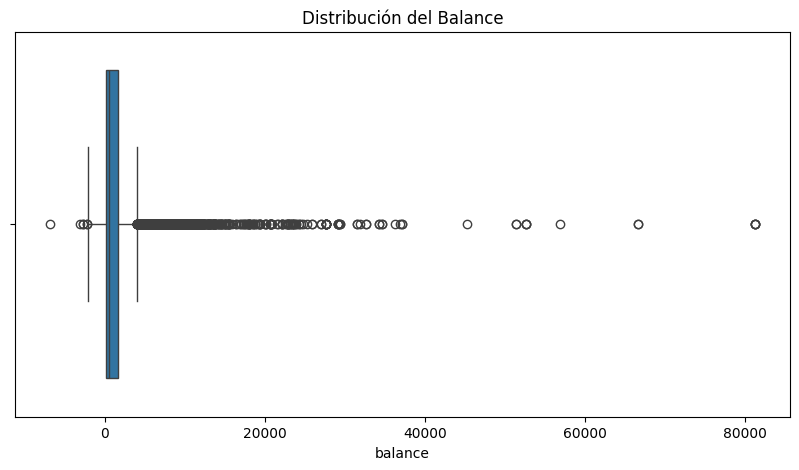

In [161]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='balance')
plt.title('Distribución del Balance')
plt.show()

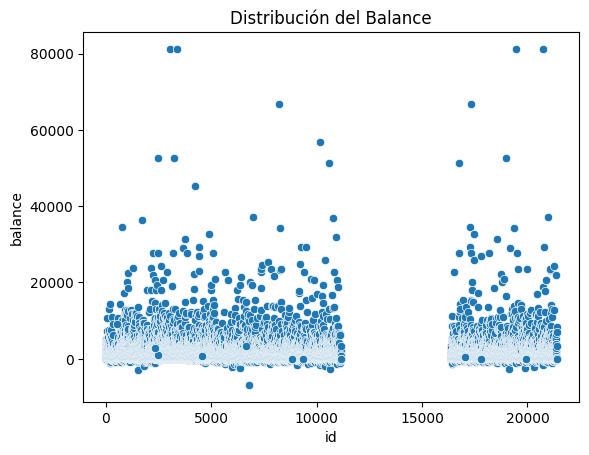

In [162]:
sns.scatterplot(x="id", y="balance", data=df_BANK_marketing)
plt.title("Distribución del Balance")
plt.show()

In [163]:
df_BANK_marketing['balance'].value_counts()

balance
 0        1113
 1          55
 2          52
 3          51
 5          44
          ... 
 1738        1
-558         1
-548         1
 8486        1
 20772       1
Name: count, Length: 3805, dtype: int64

#### Variable duration

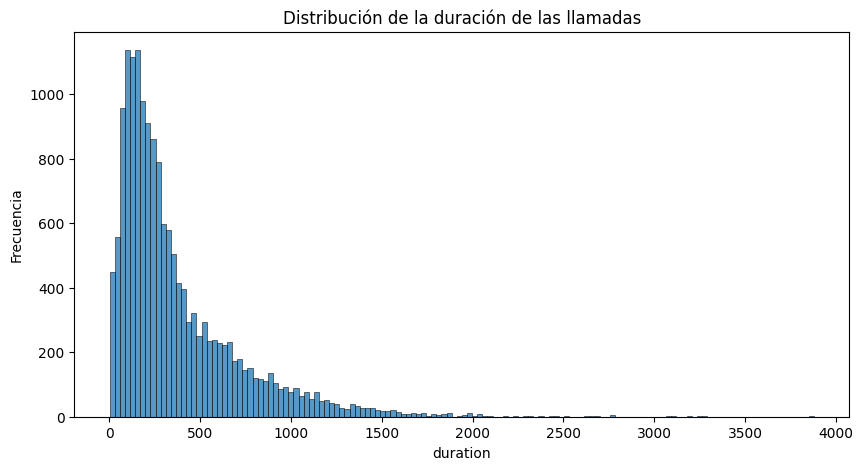

In [164]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['duration'])
plt.title('Distribución de la duración de las llamadas')
plt.xlabel('duration')
plt.ylabel('Frecuencia')
plt.show()

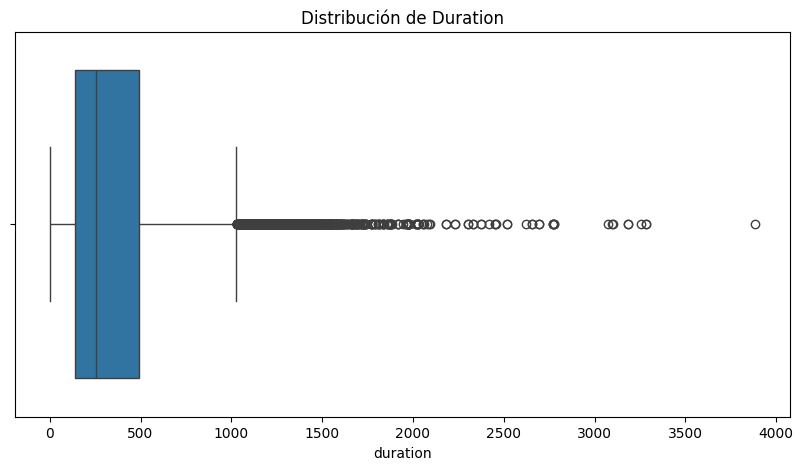

In [165]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='duration')
plt.title('Distribución de Duration')
plt.show()

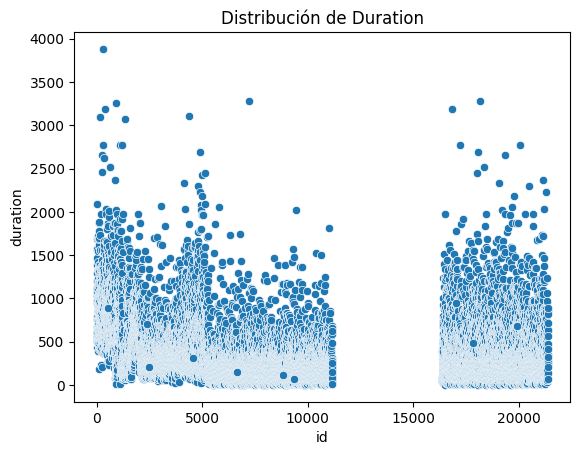

In [166]:
sns.scatterplot(x="id", y="duration", data=df_BANK_marketing)
plt.title("Distribución de Duration")
plt.show()

In [167]:
df_BANK_marketing['duration'].value_counts()

duration
97      59
119     56
161     55
150     53
136     52
        ..
1083     1
1521     1
1504     1
818      1
1689     1
Name: count, Length: 1428, dtype: int64

#### Variable campaign

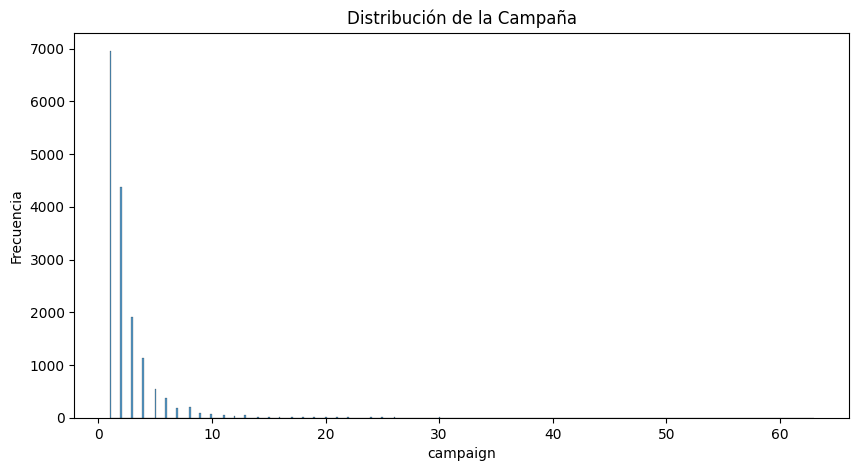

In [168]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['campaign'])
plt.title('Distribución de la Campaña')
plt.xlabel('campaign')
plt.ylabel('Frecuencia')
plt.show()

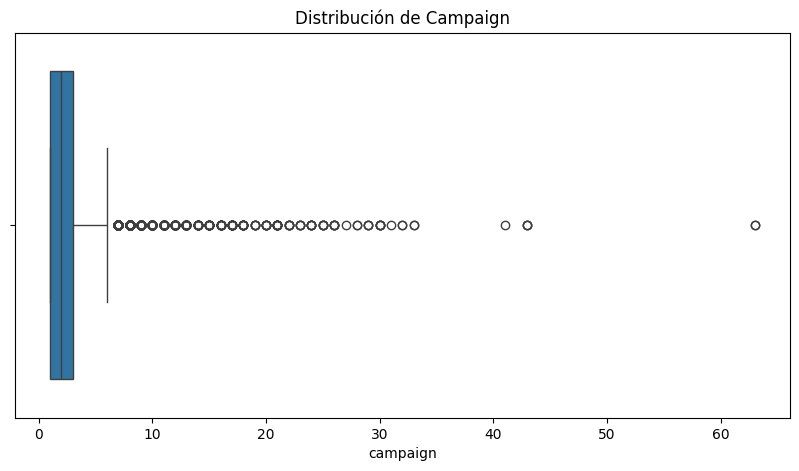

In [169]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='campaign')
plt.title('Distribución de Campaign')
plt.show()

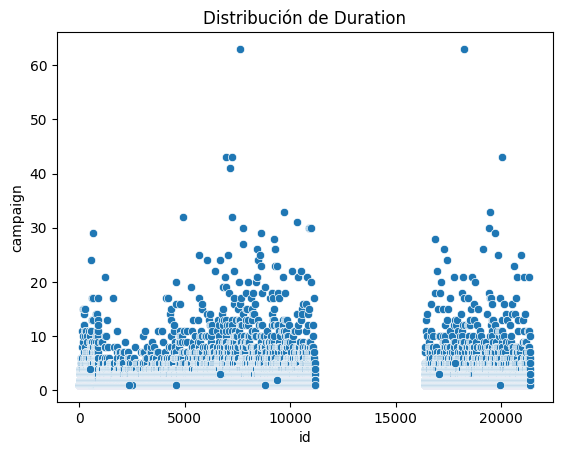

In [170]:
sns.scatterplot(x="id", y="campaign", data=df_BANK_marketing)
plt.title("Distribución de Duration")
plt.show()

In [171]:
df_BANK_marketing['campaign'].value_counts()

campaign
1     6956
2     4386
3     1917
4     1132
5      544
6      381
8      194
7      191
9       98
10      73
11      56
13      43
12      41
14      22
17      21
15      18
16      15
21      14
18      12
20       7
24       6
22       5
25       5
19       5
30       5
26       5
23       4
29       3
43       3
32       2
33       2
63       2
28       2
41       1
27       1
31       1
Name: count, dtype: int64

#### Variable age

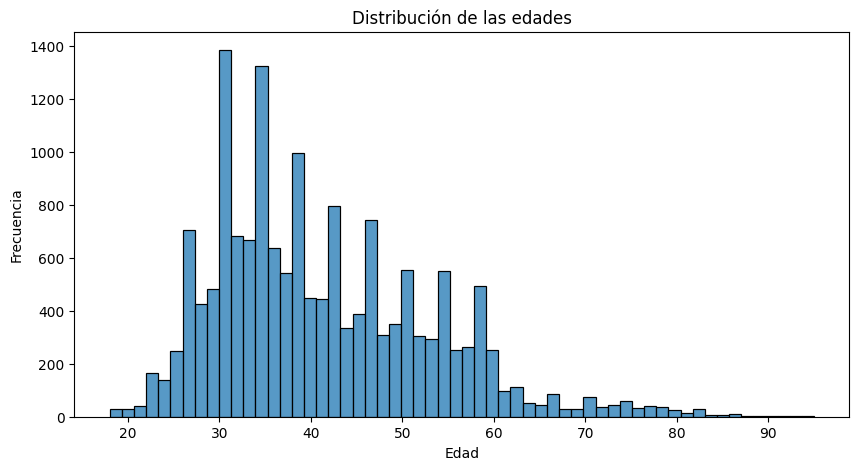

In [172]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['age'])
plt.title('Distribución de las edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

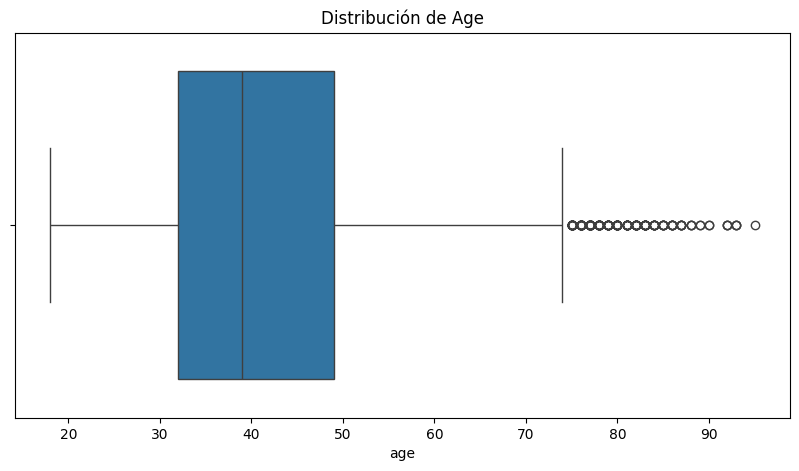

In [173]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='age')
plt.title('Distribución de Age')
plt.show()

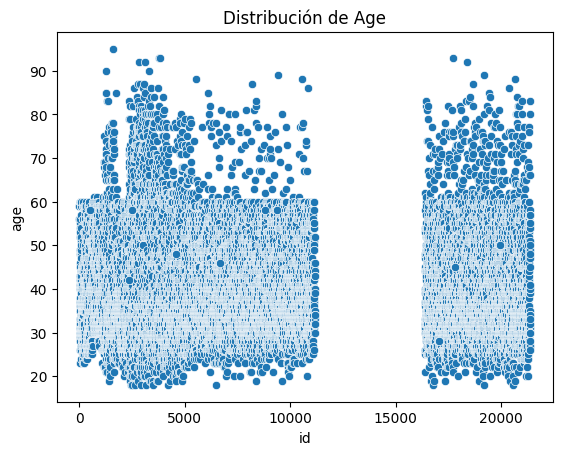

In [174]:
sns.scatterplot(x="id", y="age", data=df_BANK_marketing)
plt.title("Distribución de Age")
plt.show()

In [175]:
df_BANK_marketing['age'].value_counts()

age
31.0    713
32.0    685
30.0    673
33.0    668
34.0    668
       ... 
92.0      3
93.0      3
90.0      2
89.0      2
95.0      1
Name: count, Length: 76, dtype: int64

#### Variable pdays

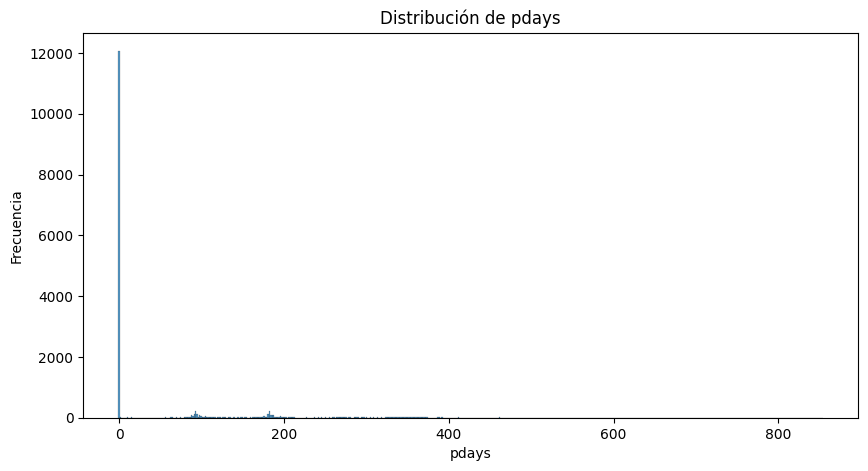

In [176]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['pdays'])
plt.title('Distribución de pdays')
plt.xlabel('pdays')
plt.ylabel('Frecuencia')
plt.show()

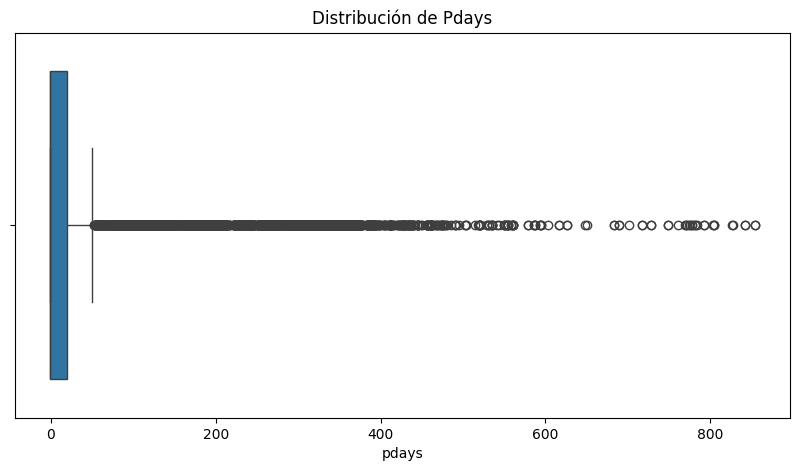

In [177]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='pdays')
plt.title('Distribución de Pdays')
plt.show()

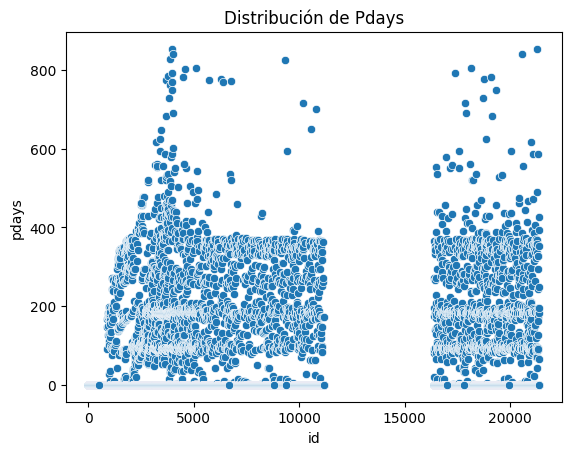

In [178]:
sns.scatterplot(x="id", y="pdays", data=df_BANK_marketing)
plt.title("Distribución de Pdays")
plt.show()

In [179]:
df_BANK_marketing['pdays'].value_counts()

pdays
-1      12064
 92       149
 182      126
 91       123
 183      110
        ...  
 651        1
 214        1
 24         1
 701        1
 118        1
Name: count, Length: 472, dtype: int64

#### Variable previous

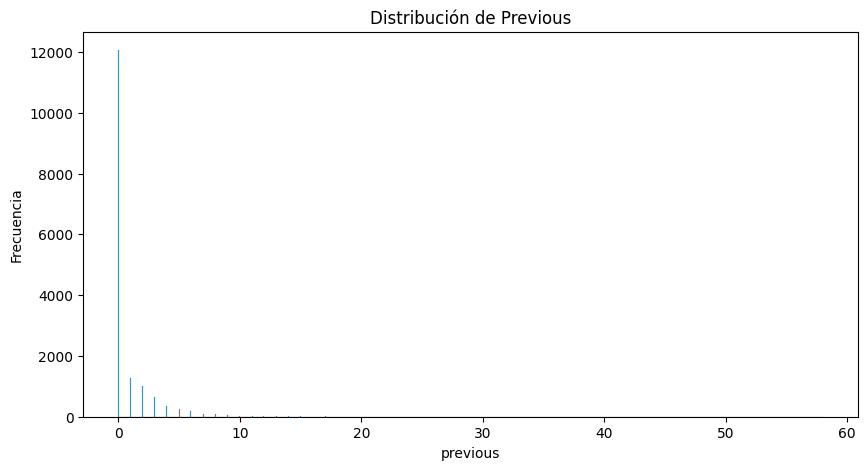

In [180]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['previous'])
plt.title('Distribución de Previous')
plt.xlabel('previous')
plt.ylabel('Frecuencia')
plt.show()

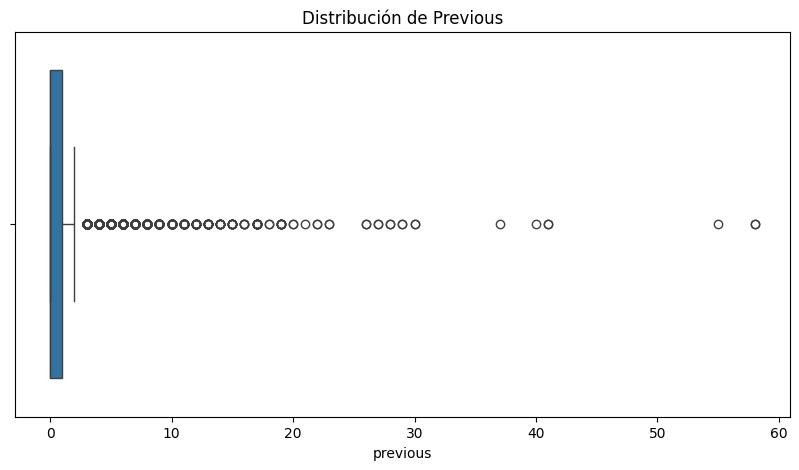

In [181]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='previous')
plt.title('Distribución de Previous')
plt.show()

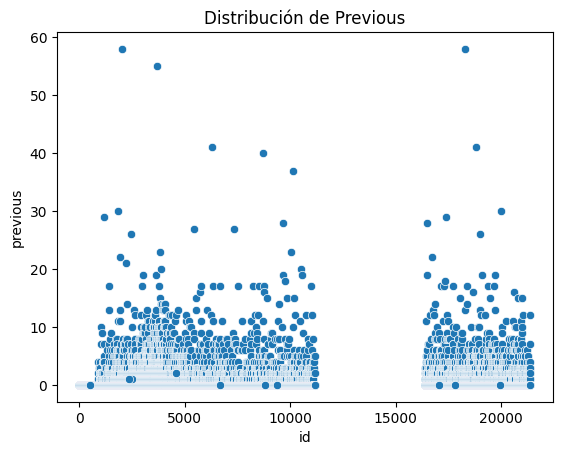

In [182]:
sns.scatterplot(x="id", y="previous", data=df_BANK_marketing)
plt.title("Distribución de Previous")
plt.show()

In [183]:
df_BANK_marketing['previous'].value_counts()

previous
0     12064
1      1290
2       997
3       640
4       349
5       244
6       173
7       106
8        86
9        45
10       40
11       29
12       23
17       17
13       16
15        9
14        8
19        7
16        4
22        2
30        2
29        2
58        2
23        2
20        2
26        2
28        2
18        2
27        2
41        2
55        1
21        1
40        1
37        1
Name: count, dtype: int64

### ANÁLISIS VARIABLES BOOLEANS

#### Variable is_in_default

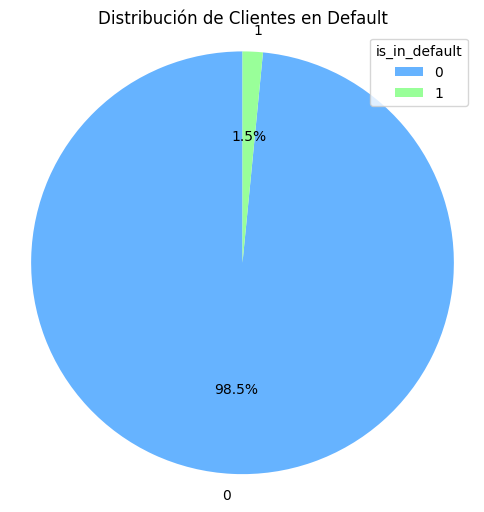

In [184]:
default_counts = df_BANK_marketing['is_in_default'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes en Default')
plt.legend(default_counts.index, title="is_in_default", loc="best")
plt.axis('equal')  
plt.show()

#### Variable housing

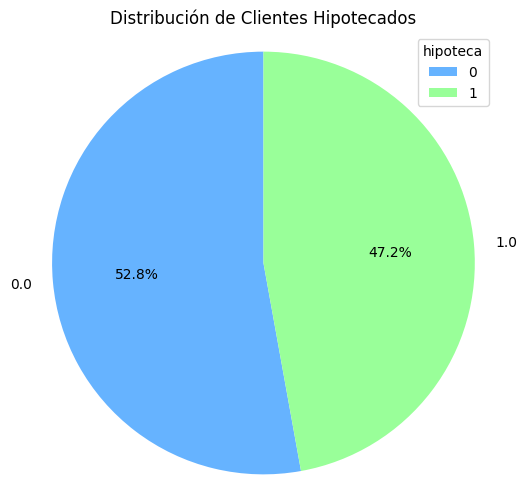

In [185]:
housing_counts = df_BANK_marketing['housing'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes Hipotecados')
plt.legend(default_counts.index, title="hipoteca", loc="best")
plt.axis('equal')  
plt.show()

#### Variable loan

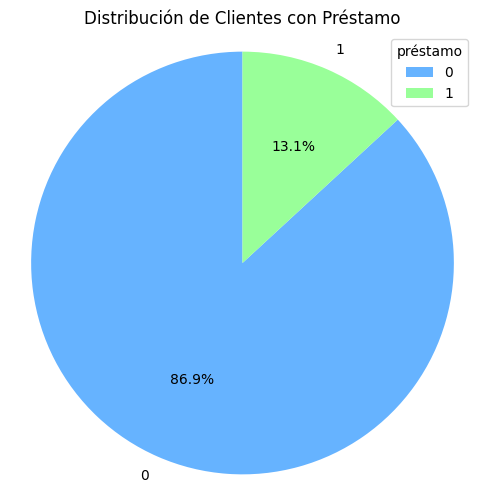

In [186]:
loan_counts = df_BANK_marketing['loan'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes con Préstamo')
plt.legend(loan_counts.index, title="préstamo", loc="best")
plt.axis('equal')  
plt.show()